<a href="https://colab.research.google.com/github/prince545/exploratory-data-analysis/blob/main/Polynomial_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [ ]:
np.random.seed(42)

x = 6 * np.random.rand(200, 1) - 3
y = 2 + 0.9 * x + 0.8 * x**2 + np.random.randn(200, 1)


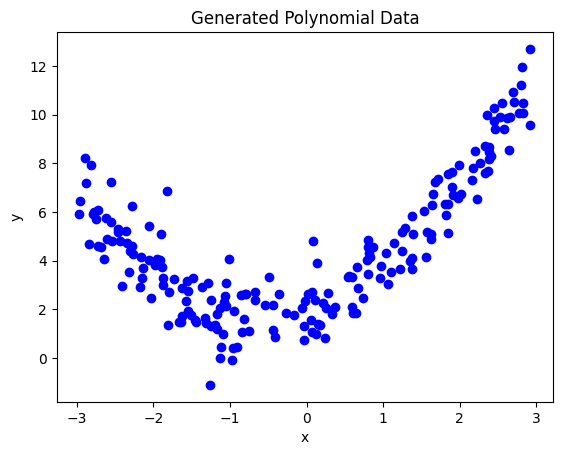

In [ ]:
plt.scatter(x, y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Polynomial Data")
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
r2_linear = r2_score(y_test, y_pred)
print("R2 Score (Linear):", r2_linear)


R2 Score (Linear): 0.04135756901999743


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

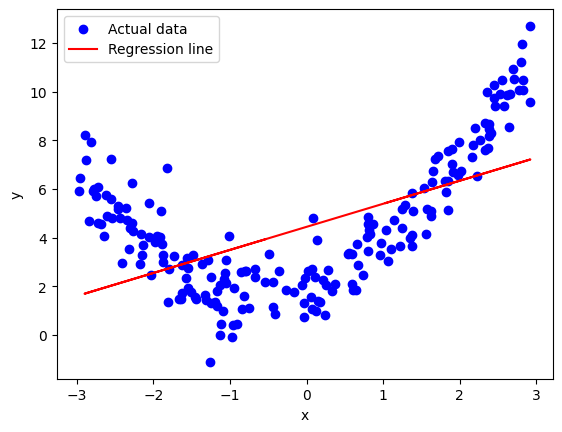

In [ ]:
plt.scatter(x, y, color='b', label='Actual data')           # scatter plot for data points
plt.plot(x_train, lr.predict(x_train), color='r', label='Regression line')  # regression line
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)


In [ ]:
print(x_train[0])
print(x_train_trans[0])


[1.03281328]
[1.         1.03281328 1.06670328]


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Transform the input data to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

# 2. Train a new regression model on the transformed features
lr_poly = LinearRegression()
lr_poly.fit(x_train_trans, y_train)

# 3. Predict using the same transformed test set
y_pred = lr_poly.predict(x_test_trans)

# 4. Evaluate the result
print("R² score:", r2_score(y_test, y_pred))


R² score: 0.8852304516573782


In [ ]:
# Print model coefficients and intercept
print(lr_poly.coef_)       # Coefficients for the polynomial terms
print(lr_poly.intercept_)  # Intercept


[[0.         0.87856418 0.8129065 ]]
[2.01928083]


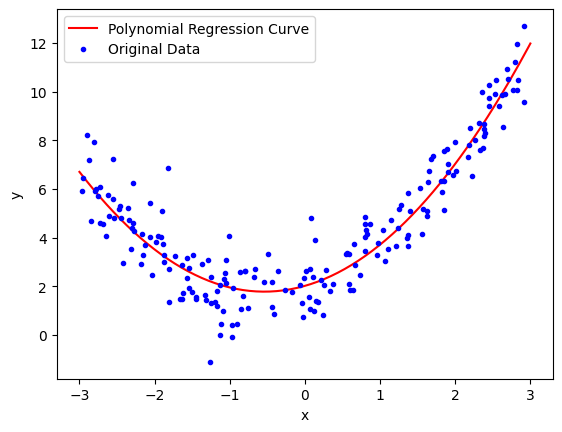

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create new x values for a smooth curve
x_new = np.linspace(-3, 3, 200).reshape(-1, 1)

# Transform x_new using the polynomial transformer
x_new_poly = poly.transform(x_new)

# Predict y values using the polynomial regression model
y_new = lr_poly.predict(x_new_poly)

# Plot the predicted curve and actual data points
plt.plot(x_new, y_new, color='r', label='Polynomial Regression Curve')
plt.plot(x, y, 'b.', label='Original Data')  # assuming 'x' and 'y' contain your data
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
import plotly.express as px

# Load the Iris dataset
df = px.data.iris()

# 3D scatter plot using three numerical features
fig = px.scatter_3d(
    df,
    x='sepal_length',
    y='sepal_width',
    z='petal_length',
    color='species',  # color by species
    title='3D Scatter Plot of Iris Dataset',
    labels={"sepal_length": "Sepal Length", "sepal_width": "Sepal Width", "petal_length": "Petal Length"}
)

fig.show()
